In [1]:
!pwd

/Users/lia/dev/dust


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import dust
import sigma_scat as ss

%matplotlib inline

In [3]:
AMIN, AMAX = 0.005, 0.25 # microns
NA  = 50  # number of points to use to sample distribution
RHO = 3.8 # grain density (g cm^-3)
P   = 3.5 # power law slope
mrn = dust.Dustdist( rad=np.linspace(AMIN,AMAX,NA), rho=RHO, p=P )

ENERGY = np.logspace(-1,1,25)
MDUST  = 1.e22 * dust.c.mp() * 0.009  # magic numbers (dust mass per 10^22 H)

## Test that Mie.Qsca works

In [4]:
import scatmodels as sms
import cmindex as cm

In [5]:
agrid = np.linspace(AMIN, AMAX, NA)

In [6]:
reload(sms)

<module 'scatmodels' from 'scatmodels.pyc'>

In [7]:
#agrid[None, :] + np.zeros((10, len(agrid)))

In [8]:
#np.tile(agrid, 10).reshape(10, len(agrid))

In [9]:
mymie = sms.Mie()

In [10]:
test = mymie.Qsca(E=ENERGY, a=agrid, cm=cm.CmSilicate() )

In [11]:
test.shape

(25, 50)

## Try out the new Kappascat

In [12]:
reload(ss)

<module 'sigma_scat' from 'sigma_scat.pyc'>

In [13]:
kappascat = ss.Kappascat(E=ENERGY, dist=dust.Dustspectrum(rad=mrn), 
                         scatm=ss.makeScatmodel('Mie','Silicate'))

In [14]:
import cProfile
import pstats

In [15]:
profile_name = 'Kappascat.prof'

In [16]:
cProfile.run("kappascat()",filename=profile_name)

In [17]:
stats = pstats.Stats(profile_name)
stats.strip_dirs()
stats.sort_stats('cumtime').print_stats(20)

Wed Sep 30 16:24:44 2015    Kappascat.prof

         588898 function calls in 12.322 seconds

   Ordered by: cumulative time
   List reduced from 43 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   12.322   12.322 <string>:1(<module>)
        1    0.000    0.000   12.322   12.322 sigma_scat.py:205(__call__)
        1    0.002    0.002   12.322   12.322 scatmodels.py:388(Qsca)
       25   11.861    0.474   12.317    0.493 scatmodels.py:131(getQs)
   335335    0.356    0.000    0.356    0.000 {numpy.core.multiarray.zeros}
    83821    0.054    0.000    0.054    0.000 {numpy.core.multiarray.where}
   167667    0.044    0.000    0.044    0.000 fromnumeric.py:2514(size)
       50    0.000    0.000    0.004    0.000 polyint.py:62(__call__)
       50    0.000    0.000    0.003    0.000 interpolate.py:492(_evaluate)
       50    0.001    0.000    0.001    0.000 interpolate.py:443(_call_linear)
       50    0.00

<pstats.Stats instance at 0x105a20098>

** Now that kappascat has run, plot it **

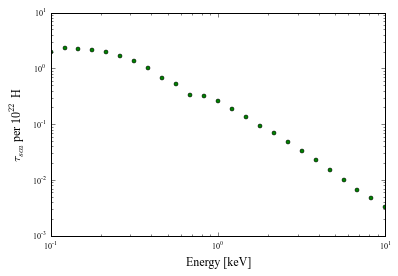

In [18]:
plt.plot( kappascat.E, kappascat.kappa * MDUST, 'go' )
plt.loglog()
plt.xlabel('Energy [keV]')
plt.ylabel(r'$\tau_{sca}$ per $10^{22}$ H')

## Do the same, for Kappaext

In [19]:
reload(ss)
reload(sms)

<module 'scatmodels' from 'scatmodels.pyc'>

In [20]:
kappaext = ss.Kappaext(E=ENERGY, dist=dust.Dustspectrum(rad=mrn), 
                         scatm=ss.makeScatmodel('Mie','Silicate'))

In [21]:
cProfile.run("kappaext()",filename="Kappaext.prof")

In [22]:
stats = pstats.Stats("Kappaext.prof")
stats.strip_dirs()
stats.sort_stats('cumtime').print_stats(20)

Wed Sep 30 16:24:58 2015    Kappaext.prof

         588898 function calls in 13.475 seconds

   Ordered by: cumulative time
   List reduced from 43 to 20 due to restriction <20>

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000   13.475   13.475 <string>:1(<module>)
        1    0.000    0.000   13.475   13.475 sigma_scat.py:250(__call__)
        1    0.002    0.002   13.475   13.475 scatmodels.py:402(Qext)
       25   12.974    0.519   13.470    0.539 scatmodels.py:131(getQs)
   335335    0.380    0.000    0.380    0.000 {numpy.core.multiarray.zeros}
    83821    0.063    0.000    0.063    0.000 {numpy.core.multiarray.where}
   167667    0.051    0.000    0.051    0.000 fromnumeric.py:2514(size)
       50    0.000    0.000    0.004    0.000 polyint.py:62(__call__)
       50    0.000    0.000    0.003    0.000 interpolate.py:492(_evaluate)
       50    0.001    0.000    0.002    0.000 interpolate.py:443(_call_linear)
       50    0.000

<pstats.Stats instance at 0x105a20bd8>

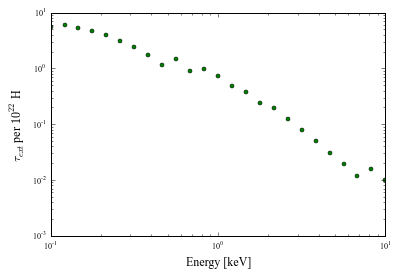

In [23]:
plt.plot( kappaext.E, kappaext.kappa * MDUST, 'go' )
plt.loglog()
plt.xlabel('Energy [keV]')
plt.ylabel(r'$\tau_{ext}$ per $10^{22}$ H')